In [2]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display



w[0]: 0.393906  b: -0.031804


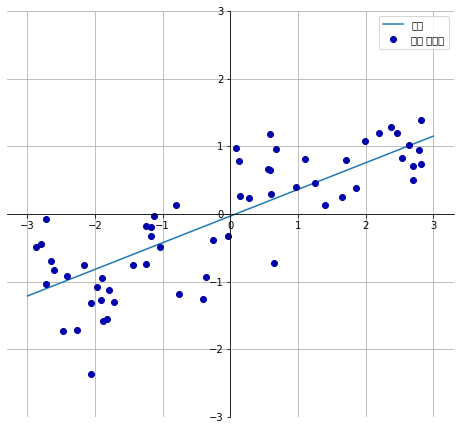

In [3]:
import warnings
warnings.filterwarnings(action='ignore')


##회귀의 선형 모델을 위한 일반화된 예측 함수는 다음과 같습니다.
##y = w1x1 + w2x2 + ... + wnxn + b
##이때 x1 ~ xn은 하나의 데이터 포인트에 대한 특성을 나타냅니다. w,b,는 모델이 학습할 파라미터입니다.
##y값은 모델이 만들어낸 예측 값입니다.

#특성이 하니인 경우, 식은 다음과 같습니다.
#y = wx+b
#wave데이터셋으로 w,b를 직선이 되도록 학습시키면 아래와 같습니다.



mglearn.plots.plot_linear_regression_wave()

In [4]:
'''
회귀에서 가장 인기있는 모델들을 소개하겠습니다.
첫번째로 선형 회귀, 또는 최소제곱법입니다. 
선형회귀는 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차를 최소화하는 파라미터w,b를 찾는 것 입니다. 
평균제곱오차는 예측값-타깃값의 제곱의 합의 평균입니다.
'''

##선형 모델 만드는 코드
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)


In [5]:
##w값은 lr 객체의 coef_속성에 저장되어 있고, b값은 intercept_속성에 저장되어 있습니다.
print(lr.coef_)
print(lr.intercept_)

[0.39390555]
-0.031804343026759746


In [6]:
##훈련 데이터와 테스트 데이터의 성능

print("{:.2f}".format(lr.score(X_train, y_train)))
print("{:.2f}".format(lr.score(X_test, y_test)))

0.67
0.66


In [ ]:
'''
훈련 세트와 테스트 세트의 점수가 매우 비슷한 것으로 보아 과대적합이 아닌, 과소적합 상태임을 알 수 있습니다. 
wave같은 1차원 데이터셋은 모델이 단순하므로 과대적합을 고려할 필요가 없지만, 고차원 데이터셋에서는 과대적합될 가능성이 높습니다.
Boston주택가격 데이터셋을 통해 이를 확인해보도록 하겠습니다.
'''

In [7]:
X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

In [8]:
print("{:.2f}".format(lr.score(X_train, y_train)))
print("{:.2f}".format(lr.score(X_test, y_test)))

0.95
0.61


In [ ]:
'''
훈련 세트와 테스트 세트 간의 성능차를 봐서 모델이 과대적합되었다는 것을 알 수 있습니다. 따라서 이러한 복잡도를 제어할 수 있는
모델을 사용해야 하고, 가장 널리 쓰이는 모델은 리지회귀입니다.
'''

In [ ]:
'''
리지 회귀에서의 가중치는 훈련 데이터를 잘 예측하기 위해서 뿐만이 아니라 추가 제약 조건을 만족시키기 위한 목적도 있습니다.
가중치의 절대값을 가능한 한 작게, 즉 w의 모든 원소가 0에 가깝게 되길 원합니다. 
이는 모든 특성이 출력에 주는 영향을 최소한으로 만느는데 이런 제약을 규제(regularizaion)이라고 합니다. 즉, 과대적합이 되지 않도록
모델을 강제로 제한한다는 의미입니다.
리지 회귀에 사용하는 규제 방식을 L2규제라고 합니다.
평균제곱오차식에 다음 항을 더하면 됩니다.
α∑w^2
α가 커지면 가중치가 감소하고, 작아지면 그 반대가 됩니다.
'''

In [9]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("{:.2f}".format(ridge.score(X_train,y_train)))
print("{:.2f}".format(ridge.score(X_test,y_test)))

0.89
0.75


In [14]:
##alpha매개변수를 통해 모델을 얼마나 단순화할지 결정할 수 있습니다. 기본값은 1.0이고 커지면 계수를 0에 가깝게 만들어서
##훈련 세트에 대해서는 성능이 떨어지지만 일반화에 도움이 됩니다.

ridge10 = Ridge(alpha = 10).fit(X_train, y_train)
print("{:.2f}".format(ridge10.score(X_train,y_train)))
print("{:.2f}".format(ridge10.score(X_test,y_test)))
print('\n')
ridge01 = Ridge(alpha = 0.1).fit(X_train, y_train)
print("{:.2f}".format(ridge01.score(X_train,y_train)))
print("{:.2f}".format(ridge01.score(X_test,y_test)))

0.79
0.64


0.93
0.77


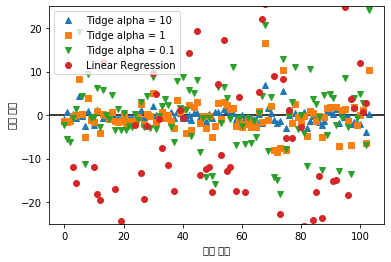

In [16]:
##alpha값에 따라 coef_의 속성이 어떻게 달라지는지 그래프를 통해 확인해보겠습니다.
plt.plot(ridge10.coef_, '^', label = "Tidge alpha = 10")
plt.plot(ridge.coef_, 's', label = "Tidge alpha = 1")
plt.plot(ridge01.coef_, 'v', label = "Tidge alpha = 0.1")

plt.plot(lr.coef_, 'o', label = "Linear Regression")
plt.xlabel('계수 목록')
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

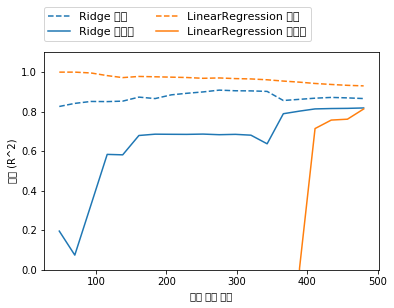

In [17]:
##규제의 효과를 이해하는 또 다른 방법은 alpha 값을 고정하고 훈련 데이터의 크기를 변화시켜 보는 것입니다.
mglearn.plots.plot_ridge_n_samples()

In [ ]:
'''
리지 회귀에는 규제가 적용되므로 리지의 훈련 데이터 점수가 선형 회귀의 훈련 데이터보다 낮은 것을 확인할 수 있습니다.
그러나 테스트 데이터에대해서는 리지의 점수가 더 높습니다.
두 모델의 성능은 데이터가 많아질수록 좋아지고 이 말은 데이터를 충분히 주면 규제 항은 덜 중요해져서 리지 회귀와 선형 회귀의 성능이
같아질 것이라는 점입니다.
'''

In [ ]:
'''
선형 회귀에 규제를 적용하는 데 Ridge의 대안으로 Lasso가 있습니다. 리지 회귀에서와 같게 가중치를 0에 가깝게 만들려고 하지만 그 방법이
다릅니다. 이를 L1 규제라고 합니다.
평균제곱오차식에 α∑|w| 를 더하면 됩니다.
L1 규제의 결과로 라소를 사용할 때 어떤 계수는 실제로 0이 됩니다. 이는 모델에서 완전히 제외되는 특성이 있다는 뜻입니다.
일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 모델의 가장 중요한 특성이 무엇인지 알 수 있습니다.
'''

In [22]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("{:.2f}".format(lasso.score(X_train, y_train)))
print("{:.2f}".format(lasso.score(X_test, y_test)))
print(np.sum(lasso.coef_ != 0))

0.29
0.21
4


In [25]:
##결과를 보시면 과소적합이 발생한 것을 알 수 있습니다. 
## alpha값을 조절하고 이에 따라 max_iter를 조절하면 다음과 같습니다.

lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print("{:.2f}".format(lasso001.score(X_train, y_train)))
print("{:.2f}".format(lasso001.score(X_test, y_test)))
print(np.sum(lasso001.coef_ != 0))

print('\n')

lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print("{:.2f}".format(lasso00001.score(X_train, y_train)))
print("{:.2f}".format(lasso00001.score(X_test, y_test)))
print(np.sum(lasso00001.coef_ != 0))

0.90
0.77
33


0.95
0.64
96


Text(0, 0.5, '계수 크기')

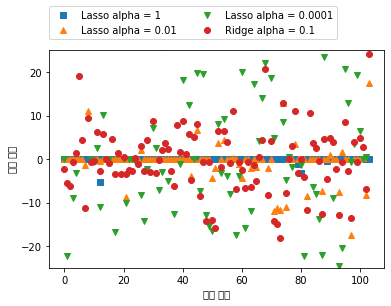

In [27]:
##alpha값이 다른 모델들의 계수를 그래프로 그리면 다음과 같습니다.

plt.plot(lasso.coef_, 's', label = "Lasso alpha = 1")
plt.plot(lasso001.coef_, '^', label = "Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, 'v', label = "Lasso alpha = 0.0001")

plt.plot(ridge01.coef_, 'o', label = "Ridge alpha = 0.1")

plt.legend(ncol = 2, loc = (0,1.05))
plt.ylim(-25,25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

In [ ]:
'''
리지와 라쏘의 패널티를 결합한 ElasticNet은 더 좋은 결과를 내지만, L1, L2 규제를 위한 매개변수 두 개를 조정해야 합니다.
ElasticNet의 식은 다음과 같습니다. 
alpha x l1 x ∑|w| + alpha x 1/2 x (1 - l1) x ∑w^2 
'''

In [ ]:
'''
이번에는 문류용 선형 모델에 대해 다뤄보겠습니다. 
회귀용 선형 모델은 출력 값이 특서의 선형 함수였습니다. 분류용 선형 모델에서는 결정 경계가 입력의 선형 함수입니다. 
다시 말하면, 이진 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기입니다. 
선형 분류 알고리즘은 크게 LogisticRegression과 LinearSVC가 있습니다. 
'''

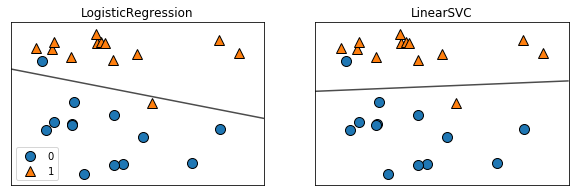

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize = (10,3))

for model, ax in zip([LogisticRegression(), LinearSVC()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps = 0.5, ax = ax, alpha = 0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title(clf.__class__.__name__)
axes[0].legend()

In [ ]:
'''
위 그래프는 두 모델의 결정 경계를 나타낸 것 입니다. 직선의 아래는 0, 직선의 위는 1로 판단하는 역할을 합니다.
두 모델의 규제의 강도를 결정하는 매개변수는 C입니다.
C가 클수록 규제가 감소하고 작을수록 규제가 커집니다. C값이 작을수록 가중치가 0에 가까워집니다.
'''

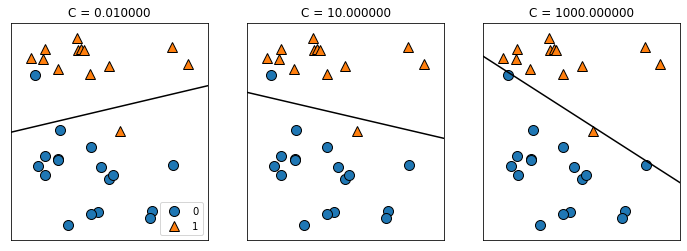

In [31]:
mglearn.plots.plot_linear_svc_regularization()

In [ ]:
'''
위 그래프를 보시면 왼쪽은 작은 C값 때문에 규제가 많이 적용되었습니다. 모델이 비교적 수평에 가까운 것을 확인할 수 있습니다.
가운데는 C값이 조금 커진 상태입니다. 잘못 분류한 샘플에 보다 민감해져 기울기가 급해진 것을 알 수 있습니다. 오른쪽은 C값을 아주
크게 하였더니 경계가 더 기울었고 분류를 보다 정확하게 하였습니다. 하지만 이는 전체적인 배치를 잘 파악하지 못한 것으로
과대적합된 것을 알 수 있습니다.
'''

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
logreg = LogisticRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.941
테스트 세트 점수: 0.965


In [33]:
##세트 양쪽에서 높은 결과가 나왔지만 값이 비슷해서 과소적합이 일어난 것을 알 수 있습니다.
#C를 증가시켜 제약을 풀어주도록 하겠습니다.

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.951
테스트 세트 점수: 0.958


In [34]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.937
테스트 세트 점수: 0.930


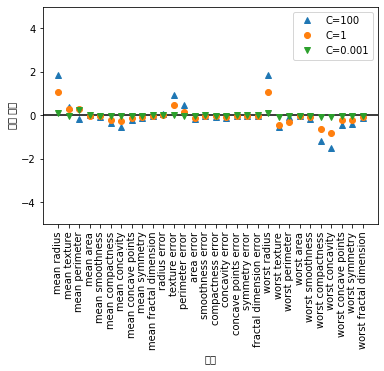

In [35]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


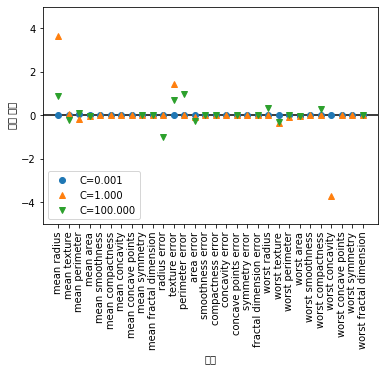

In [36]:
##L1규제를 사용하면 다음과 같습니다.
##penalty를 통해 규제를 정할 수 있습니다.

for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

In [ ]:
'''
로지스틱 회귀를 제외하고는 선형 분류 모델은 이진 분류만 지원합니다. 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는
보편적인 방법은 일대다 방법입니다. 이는 클래스의 수만큼 이진 분류 모델을 만든 후 가장 높은 점수를 내는 분류기의 클래스를 
예측값으로 선택합니다. 
3개의 클래스를 가진 데이터셋에 일대다 방식을 적용해보도록 하겠습니다. 
'''

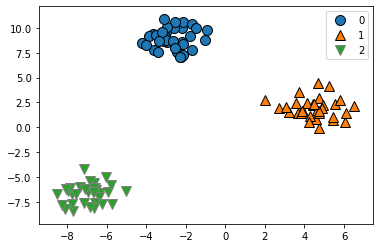

In [40]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 42)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["0","1","2"])

In [39]:
linear_svm = LinearSVC().fit(X,y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


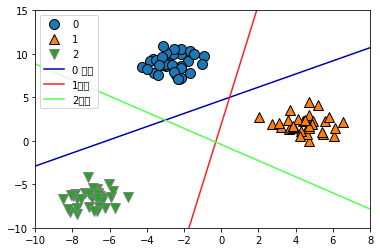

In [46]:
###3개의 행은 세 개의 클래스에 대응하는 계수 벡터를 담고 있고 여기서는 2개의 열, 즉 2개를 가지고 있습니다. 
##세 개의 이진 분류기가 만드는 경계를 시각화하면 다음과 같습니다.

mglearn.discrete_scatter(X[:,0], X[:, 1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+ intercept)/coef[1], c = color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.legend(["0","1","2","0 경계","1경계","2경계"])

##가운데 삼각형 영역에서는 가장 가까운 직선의 클래스로 분류가 됩니다.

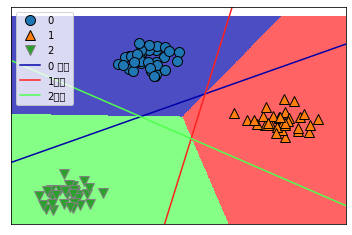

In [48]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill = True, alpha = .7)
mglearn.discrete_scatter(X[:,0], X[:, 1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+ intercept)/coef[1], c = color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.legend(["0","1","2","0 경계","1경계","2경계"])

In [ ]:
'''
선형 모델의 주요 매개변수는 회귀 모델에서는 alpha였고 LinearSVC와 LogisticRegression에서는 C입니다 alpha값이 클수록, C값이 작을수록
모델이 단순해집니다. 그리고 L1규제를 사용할지, L2규제를 사용할지를 결정해야 합니다. 기본적으로는 L2를 사용하나, 중요한 특성이
많지 않거나, 모델의 해석이 중요한 요소일 때 주로 사용합니다.
선형 모델은 샘플에 비해 특성이 많을 때 잘 작동합니다. 다른 모델로 학습하기 어려운 매우 큰 데이터셋에도 선형 모델을 많이 사용하지만,
저차원의 데이터셋에서는 다른 모델들의 일반화 성능이 더 좋습니다. 
'''